### **AIDS Classification Dataset**

**Introduction:**

I have selected an AIDS dataset from 1996 with 5,000 samples (persons involved in analysis). The characteristics included in the 23 columns describe some informtaion about the persons involved, such as: drugs they have taken before, their age, gender, and other health indicators. I will analyze the data and use this dataset to create networks and gain insights about it. I will compare between different attributes and their relationship with the node, as well as edge weights. Even though I know the dataset is not ideal, I believe that it includes valuable information and is within my area of interest.


---



**Network Information:**


*   Nodes: persons involved/ patients
*   Attributes: Attribute information found on the following link: https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction?select=AIDS_Classification_5000.csv (any attributes used in analysis will be briefly described in their relevant section for ease of understanding)
*   Edges: depending on what properties we are analyzing and what insights I want ot gain edges will be determined based on what attributes certain groups share.
*   Edge weights: I will identify the edge weights based on the frequency and similarity of attributes










In [23]:
#importing libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#reading the csv file/ dataset
df = pd.read_csv('AIDS_Classification_5000.csv')

# showing the first rows of the dataset
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,988,2,42,71.76131,0,0,0,100,0,1,...,1,3,0,0,0,290,408,1870,1671,0
1,413,3,30,72.67629,0,1,0,100,0,1,...,0,1,0,0,0,506,446,1372,523,0
2,1119,0,37,73.75514,0,1,0,90,0,1,...,1,3,0,0,0,499,542,609,1474,0
3,680,3,34,70.03769,0,0,0,100,0,0,...,0,1,0,1,0,313,478,780,987,0
4,1043,3,35,63.02845,0,0,0,100,0,1,...,0,1,0,1,0,337,761,698,1735,0


## **Network Creation and Analysis**


After attempting to iterate the data in order to analyze it and create network visualizations, I realized that due to its large size, iteration of the whole dataset at once would be very resource-intensive so, I will be dividing the data into different groups depending on what attributes I want to analyze and the metrics I want to measure.
I also iterated and optimized the dataset to improve the results of the network analysis and certain statistical measures like: degree distribution, clustering, centrality etc. However, some network visualizations and comparisons will be done using the regular, unchanged dataset.



In [4]:
# Creating a graph object
G_optimized = nx.Graph()

# Add nodes (patients) with their attributes (age, treatment indicator[ZDF only or others], gender, and race)
for index, row in df.iterrows(): #iterating the chosen attributes/rows
    G_optimized.add_node(index, #specifying the index for adding nodes
                         age=row['age'],
                         treatment=row['treat'],
                         gender=row['gender'],
                         race=row['race'])

# Connecting patients within the same treatment group
for treatment_group, patients in df.groupby('treat'):
    patient_indices = patients.index.tolist()#adding indices

    for i in range(len(patient_indices)):
        for j in range(i + 1, len(patient_indices)):
            G_optimized.add_edge(patient_indices[i], patient_indices[j], weight=1)# edge criteria and edge weight

# Displaying the network properties
no_nodes_optim = G_optimized.number_of_nodes()
no_edges_optim = G_optimized.number_of_edges()


print(f"Number of patients (nodes): {no_nodes_optim}")
print(f"Number of connections (edges): {no_edges_optim}")

Number of patients (nodes): 5000
Number of connections (edges): 7579216


The code in the cell below shows how to create a regular network graph using the optimized data. When viewing the result for this code, we can observe that the nodes are very clustered and the edges are not clear, and that is due to the huge size and the nature of the relationships between the nodes; therefore, this code is only for display of understanding. The actual visualizations of the regular non-optmized data will be found below, in later cells.

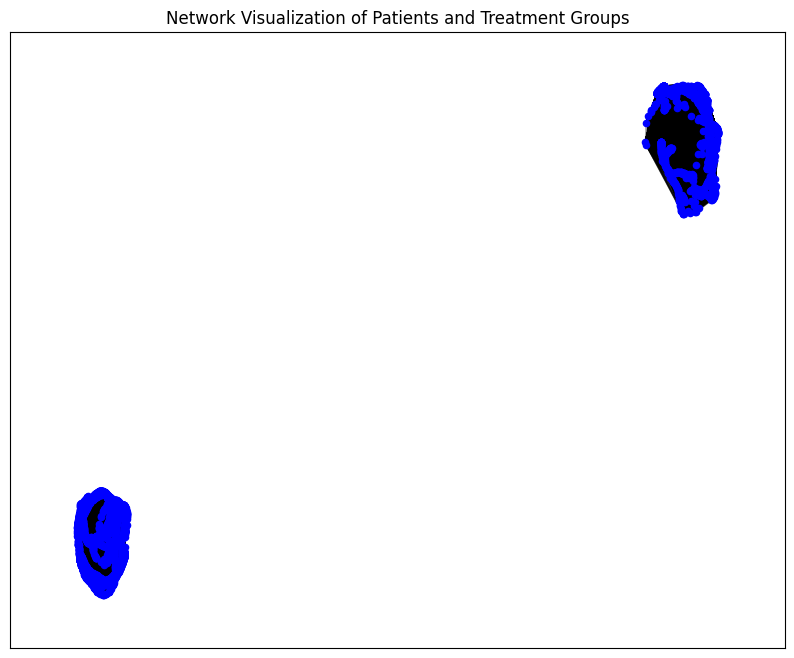

In [6]:
plt.figure(figsize=(10, 8))# specifying figure size (width and height)
pos = nx.spring_layout(G_optimized)  # Position  nodes using the spring layout
nx.draw_networkx_nodes(G_optimized, pos, node_size=20, node_color='blue')# specifying node properties
nx.draw_networkx_edges(G_optimized, pos, alpha=0.2)# specifying edges properties (I attempted to change alpha to improve the layout but the data is just too much and too staurated)
plt.title('Network Visualization of Treatment Groups')
plt.show()

The graph below shows the amount of nodes that have certain number of degrees/ edges. It is evident that degrees and the frequency are directly proportionsl; most nodes have more than 1,800 degrees which means that nodes in the network are highly connected to each other.

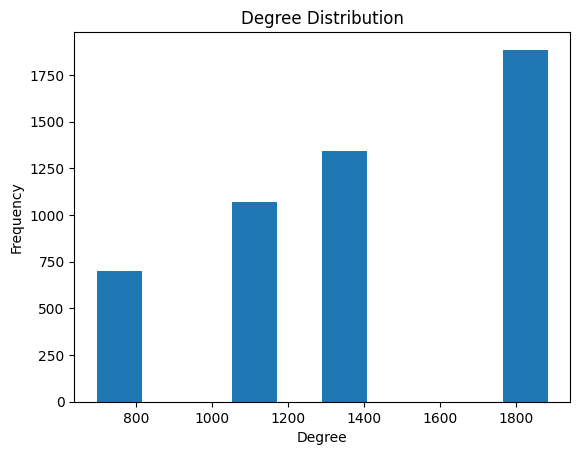

In [9]:
#This bar chart displays the degree distribution of the optimized graph
degrees = [G_optimized.degree(n) for n in G_optimized.nodes()]
plt.hist(degrees)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [11]:
#connected component analysis
connected_components = list(nx.connected_components(G_optimized))# function to find the number of connected components in the optimized graph
num_components = len(connected_components)
largest_component = max(connected_components, key=len)
print("No. of connected components:", num_components)
print("Size of the largest component:", len(largest_component))
#This code will display the number of connected components or nodes and the size of the largest component

Number of connected components: 4
Size of the largest component: 1885


In [13]:
#Path Analysis
# Find the largest connected component
largest_component = max(nx.connected_components(G_optimized), key=len)

# Create a subgraph from the largest component
G_largest_component = G_optimized.subgraph(largest_component)

# Calculate average shortest path length on the largest component
avg_shortest_path_length = nx.average_shortest_path_length(G_largest_component)
print("Avg shortest path length of the largest component:", avg_shortest_path_length)

Avg shortest path length of the largest component: 1.0


Even though I was unable to complete running the below cell due to the large size of the data. I included it to clarify how we can calculate the clustering coefficient for the optimized graph.
(a real clustering coefficient will be computed for a different portion of data later in the project)

In [7]:
clustering_coefficient = nx.average_clustering(G_optimized) #takes way too long to run for G_optim
density = nx.density(G_optimized)

KeyboardInterrupt: 

As we can see by the varying degree centralities, some nodes have much higher centrality values, which means that they are more extensively connected to other nodes within the dataset. For our data, this would mean that they are probably individuals/ patients who were infected with AIDS and a lot of their treatment history was collected .

In [17]:
centrality = nx.degree_centrality(G_optimized)
centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)# organizing the results by descending order
print(centrality)

[(2, 0.376875375075015), (5, 0.376875375075015), (6, 0.376875375075015), (12, 0.376875375075015), (13, 0.376875375075015), (18, 0.376875375075015), (21, 0.376875375075015), (26, 0.376875375075015), (30, 0.376875375075015), (33, 0.376875375075015), (34, 0.376875375075015), (35, 0.376875375075015), (36, 0.376875375075015), (39, 0.376875375075015), (40, 0.376875375075015), (41, 0.376875375075015), (45, 0.376875375075015), (47, 0.376875375075015), (48, 0.376875375075015), (51, 0.376875375075015), (55, 0.376875375075015), (60, 0.376875375075015), (61, 0.376875375075015), (64, 0.376875375075015), (65, 0.376875375075015), (66, 0.376875375075015), (67, 0.376875375075015), (69, 0.376875375075015), (71, 0.376875375075015), (73, 0.376875375075015), (74, 0.376875375075015), (76, 0.376875375075015), (79, 0.376875375075015), (81, 0.376875375075015), (86, 0.376875375075015), (90, 0.376875375075015), (91, 0.376875375075015), (94, 0.376875375075015), (95, 0.376875375075015), (96, 0.376875375075015), (9

# **Improved Network Visualization for original dataframe and using Specific Attributes**

The purpose of the below network analysis and visualizations is to determine how closely related the nodes of patients and attributes are and which visualizations represent it best.

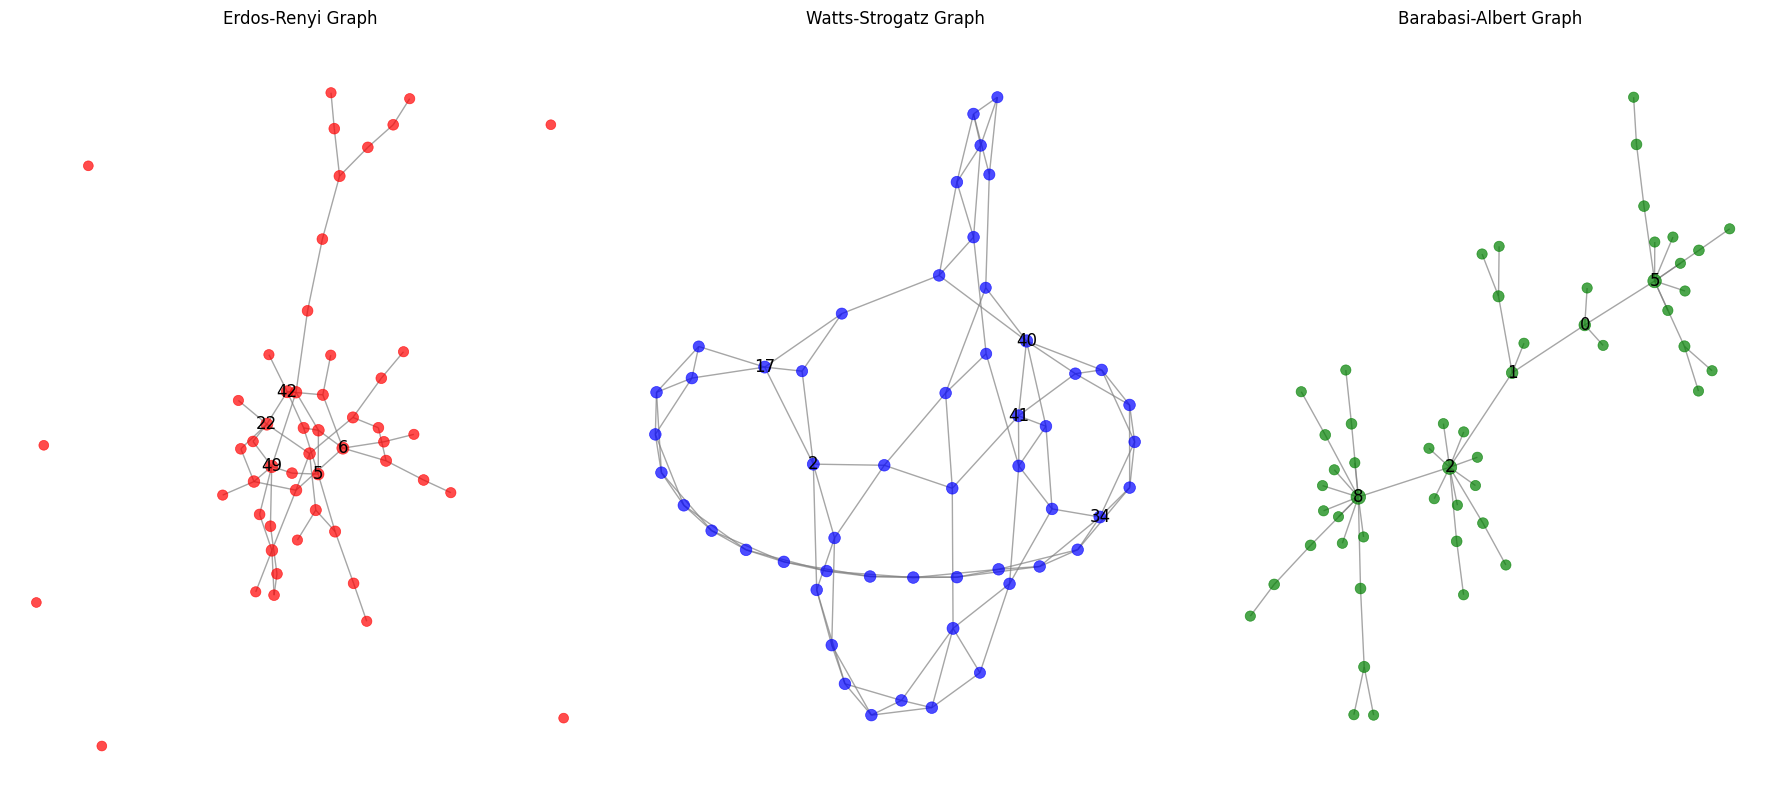

In [11]:
# Parameters for the graph generation
no_nodes = len(df)  #  referring back to the dataset to determine the no. of nodes


# Create the graphs
erdos_renyi_graph = nx.erdos_renyi_graph(n=n_nodes, p=0.05)
watts_strogatz_graph = nx.watts_strogatz_graph(n=n_nodes, k=4, p=0.1)#nodes are connected to the nearest node
barabasi_albert_graph = nx.barabasi_albert_graph(n=n_nodes, m=1)#each node is connected to m other nodes

# Function to draw the graph with enhanced visualization
def draw_graph(graph, title, color, layout=nx.spring_layout):# I selected the spring layout for clearer visualization
    plt.title(title)
    plt.axis('off')
    pos = layout(graph)
    node_sizes = [50 + 5 * graph.degree(n) for n in graph.nodes()]  # Node size based on degree
    nx.draw(graph, pos, with_labels=False, node_size=node_sizes, node_color=color, alpha=0.7, edge_color='gray', linewidths=0.5)
    high_degree_nodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:5]  # Top 5 high degree nodes
    labels = {node: node for node, degree in high_degree_nodes}# specifying nodes from highest degrees
    nx.draw_networkx_labels(graph, pos, labels, font_size=12, font_color='black')

# Plotting the graphs
plt.figure(figsize=(18, 8))

# Erdos-Renyi Graph
plt.subplot(131)
draw_graph(erdos_renyi_graph, 'Erdos-Renyi Graph', 'red')

# Watts-Strogatz Graph
plt.subplot(132)
draw_graph(watts_strogatz_graph, 'Watts-Strogatz Graph', 'blue')

# Barabasi-Albert Graph
plt.subplot(133)
draw_graph(barabasi_albert_graph, 'Barabasi-Albert Graph', 'green')

plt.tight_layout()
plt.show()


Example of a simple network comparing between the age and whether a person is infected with AIDS or not.
Nodes: (Age, infected)
Edges: age connected to 1= infected, age connected to 0= not infected
Research question: What is the relationship between a person's age and AIDS infection?

# Full Graph and Statistical Analysis

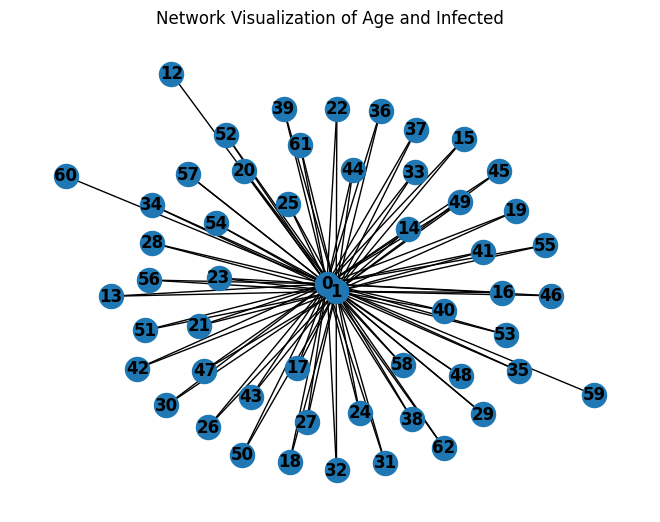

In [19]:
# Creating the graph
G1 = nx.from_pandas_edgelist(df, 'age', 'infected')

# network graph characteristics and creation
nx.draw(G1, with_labels=True, font_weight='bold')
plt.title('Network Visualization of Age and Infected')
plt.show()

Individuals on both extreme ends of the age spectrum (very young or very old) usually are less likely to be infected with AIDS as is shown in the network graph. While middle aged individuals and those in the youn adults category are more likely to be infected (21-40).

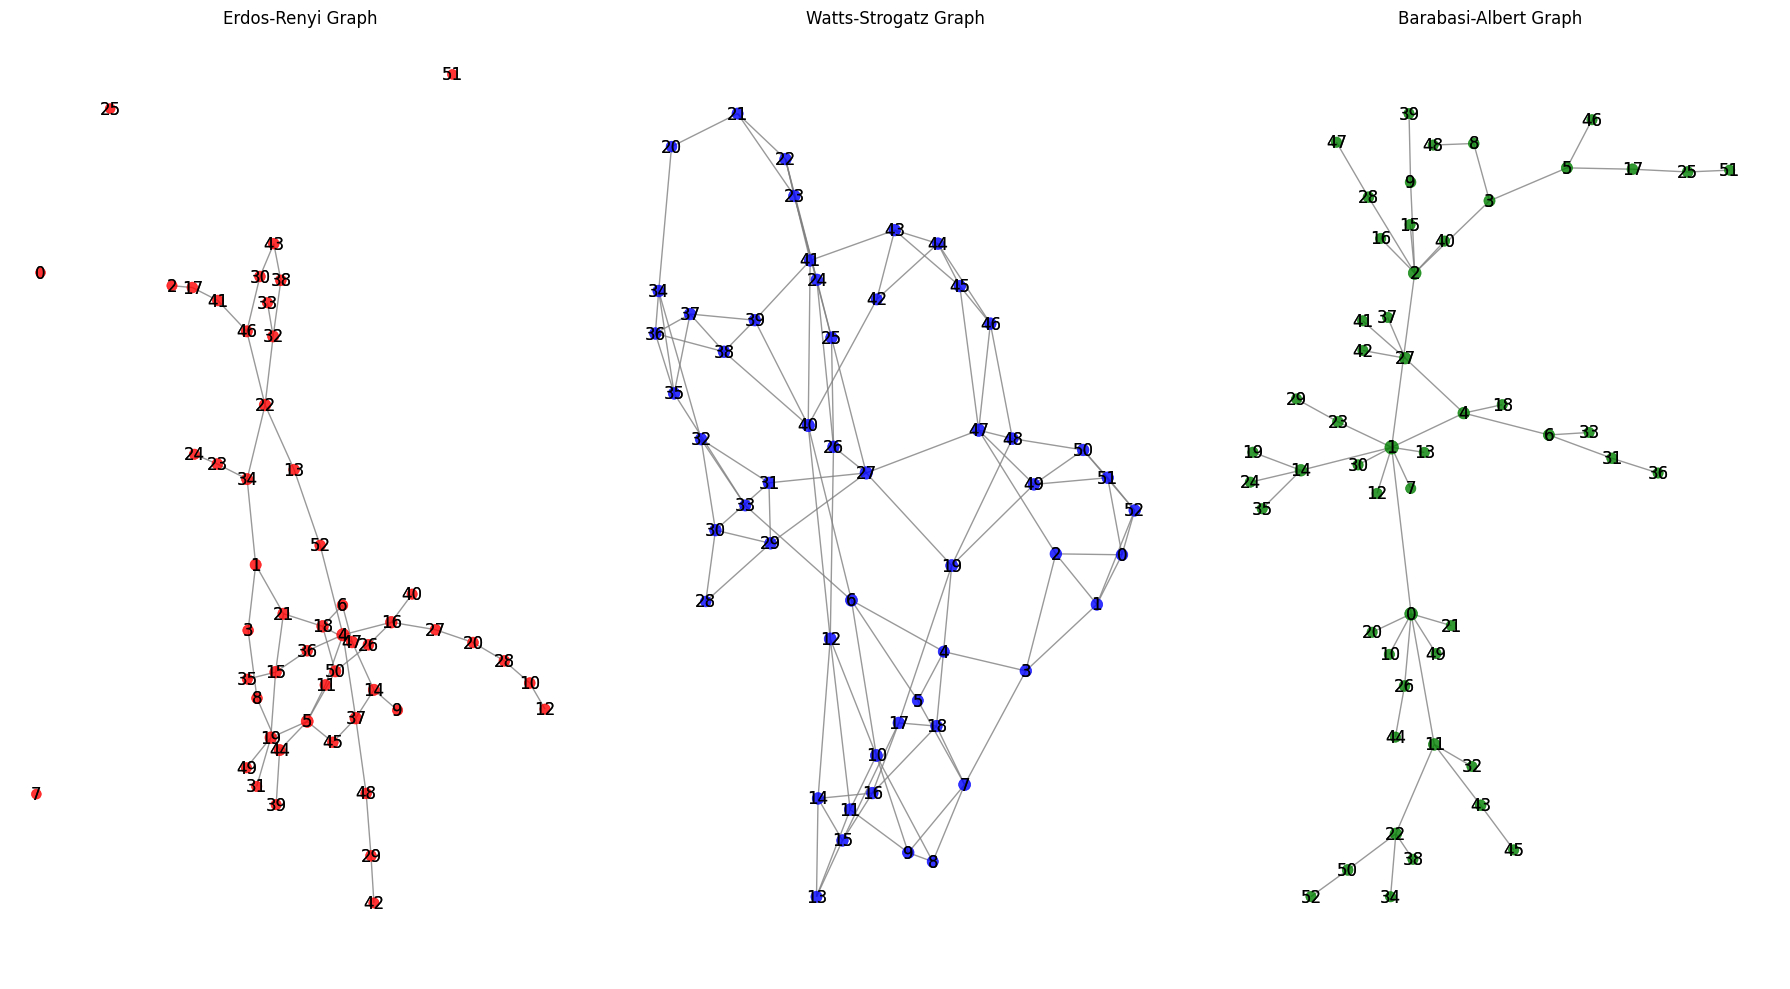

In [20]:
# Get the number of nodes from the relevant graph (graph 1; age and infected)
n_nodes = len(G1.nodes())

# Create the graphs and defining parameters
erdos_renyi_graph = nx.erdos_renyi_graph(n=n_nodes, p=0.05)
watts_strogatz_graph = nx.watts_strogatz_graph(n=n_nodes, k=4, p=0.1)
barabasi_albert_graph = nx.barabasi_albert_graph(n=n_nodes, m=1)

# Added function to draw the graph with enhanced visualization
def draw_graph(graph, title, color, layout=nx.spring_layout):
    plt.title(title)
    pos = layout(graph)
    node_sizes = [50 + 5 * graph.degree(n) for n in graph.nodes()]  # Node size based on degree
    nx.draw(graph, pos, with_labels=True, node_size=node_sizes, node_color=color, alpha=0.8, edge_color='gray', linewidths=0.5)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_color='black')

# Plotting the graphs
plt.figure(figsize=(18, 10))

# Erdos-Renyi Graph
plt.subplot(131)
draw_graph(erdos_renyi_graph, "Erdos-Renyi Graph", 'red')

# Watts-Strogatz Graph
plt.subplot(132)
draw_graph(watts_strogatz_graph, "Watts-Strogatz Graph", 'blue')

# Barabasi-Albert Graph
plt.subplot(133)
draw_graph(barabasi_albert_graph, "Barabasi-Albert Graph", 'green')

plt.tight_layout()
plt.show()


# Connected Components Analysis

Number of connected components: 7


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


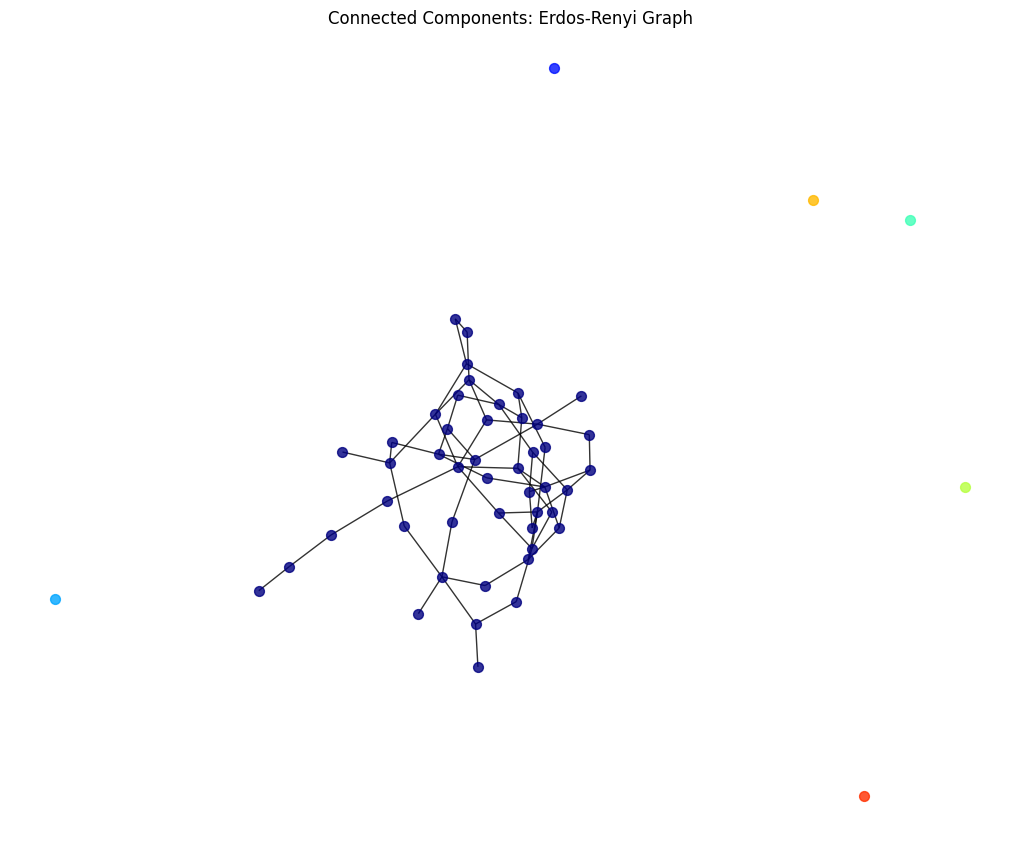

Number of connected components: 1


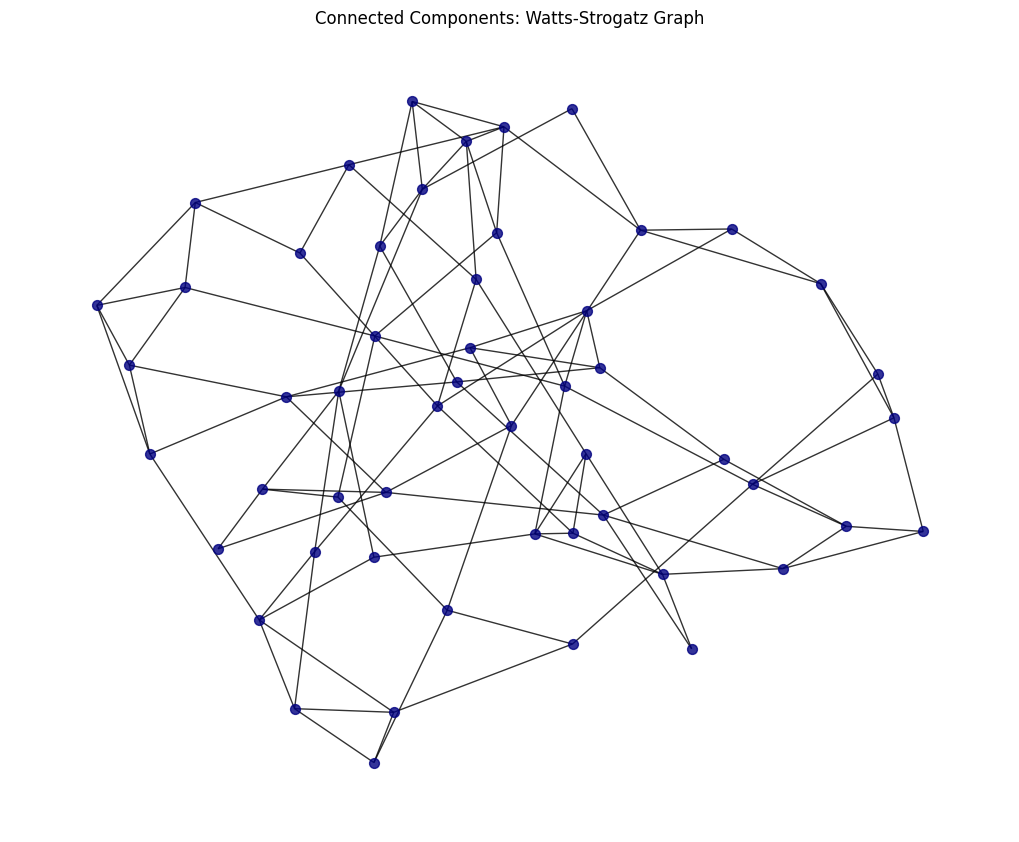

Number of connected components: 1


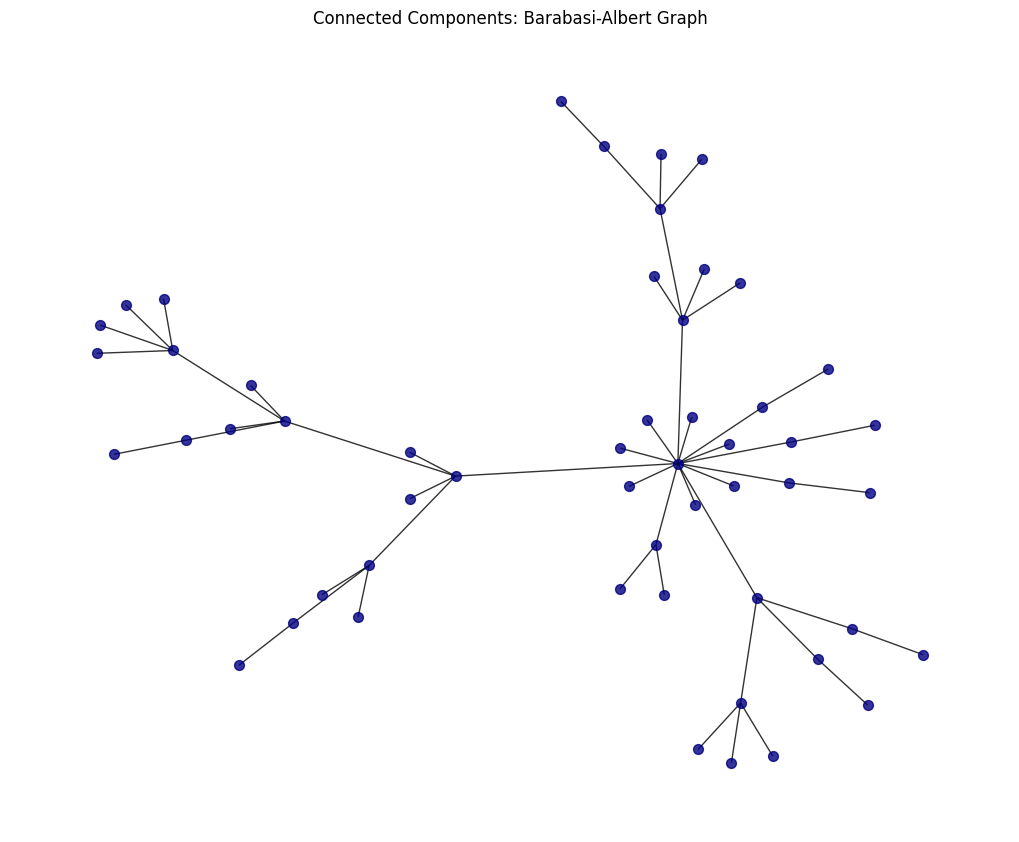

In [22]:
graph = nx.from_pandas_edgelist(df, 'age', 'infected')

# Example function to plot connected components
def plot_connected_components(graph, title):
    # Find connected components
    connected_components = list(nx.connected_components(graph))
    num_components = len(connected_components)

    print(f"Number of connected components: {num_components}")

    # Draw each component in a different color
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    for i, component in enumerate(connected_components):
        subgraph = graph.subgraph(component)
        nx.draw(subgraph, pos, node_size=30, node_color=plt.cm.jet(i / num_components), with_labels=False, alpha=0.8)

    plt.title(title)
    plt.show()


erdos_renyi_graph = nx.erdos_renyi_graph(n=n_nodes, p=0.05)
watts_strogatz_graph = nx.watts_strogatz_graph(n=n_nodes, k=4, p=0.2)
barabasi_albert_graph = nx.barabasi_albert_graph(n=n_nodes, m=1)

# Plot connected components for each generated graph
plot_connected_components(erdos_renyi_graph, "Connected Components: Erdos-Renyi Graph")
plot_connected_components(watts_strogatz_graph, "Connected Components: Watts-Strogatz Graph")
plot_connected_components(barabasi_albert_graph, "Connected Components: Barabasi-Albert Graph")


# Degree Distribution

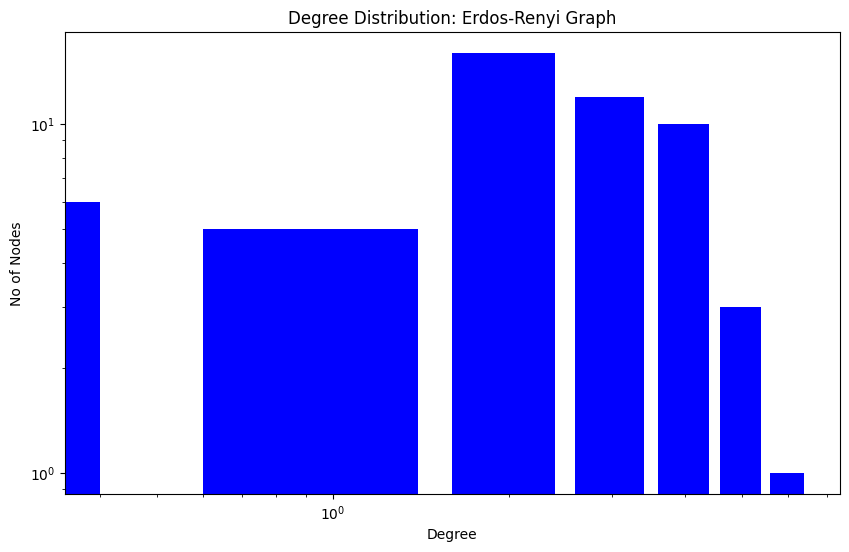

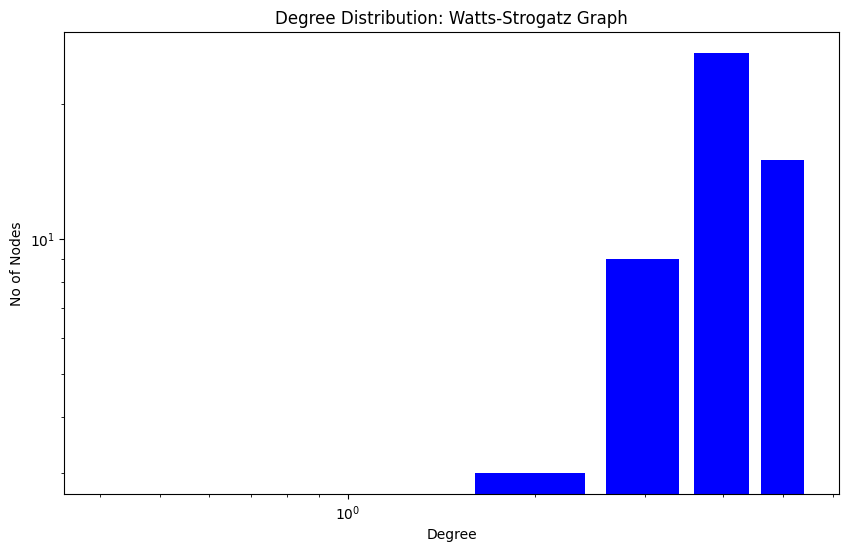

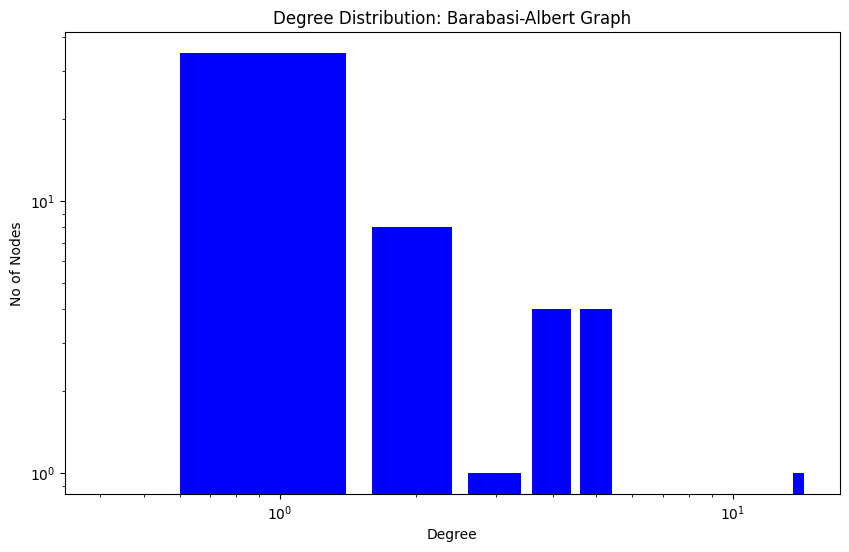

In [24]:
def plot_degree_distribution(graph, title):
    degrees = [d for n, d in graph.degree()]
    degree_count = np.bincount(degrees)
    degrees = np.arange(len(degree_count))

    plt.figure(figsize=(10, 6))
    plt.bar(degrees, degree_count, width=0.80, color='b')
    plt.title(f"Degree Distribution: {title}")
    plt.xlabel('Degree')
    plt.ylabel('No of Nodes')
# Using a logarithmic scale to make the visualization clearer
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

# Plotting degree distributions
plot_degree_distribution(erdos_renyi_graph, "Erdos-Renyi Graph")
plot_degree_distribution(watts_strogatz_graph, "Watts-Strogatz Graph")
plot_degree_distribution(barabasi_albert_graph, "Barabasi-Albert Graph")


# Path Analysis

I used a function that automatically computes the metrics to simplify the process and save time

In [25]:
# defined the nodes just to ensure it's using the correct parameters
n_nodes = len(G1)

# Create the graphs
erdos_renyi_graph = nx.erdos_renyi_graph(n=n_nodes, p=0.05)
watts_strogatz_graph = nx.watts_strogatz_graph(n=n_nodes, k=4, p=0.2)
barabasi_albert_graph = nx.barabasi_albert_graph(n=n_nodes, m=1)


# Function to compute network metrics
def compute_metrics(G1):
    metrics = {}

    # Path Analysis
    if nx.is_connected(G1):
        metrics['avg_shortest_path_length'] = nx.average_shortest_path_length(G1)
    else:
        metrics['avg_shortest_path_length'] = None

    # Other metrics
    metrics['avg_clustering_coefficient'] = nx.average_clustering(G1)
    metrics['density'] = nx.density(G1)
    metrics['degree_centrality'] = nx.degree_centrality(G1)
    metrics['betweenness_centrality'] = nx.betweenness_centrality(G1)
    metrics['closeness_centrality'] = nx.closeness_centrality(G1)

    return metrics

# Graph Metrics and Degree Centrality Distribution


Erdos-Renyi Graph Metrics:
  avg_shortest_path_length: None
  avg_clustering_coefficient: 0.01096136567834681
  density: 0.054426705370101594
  degree_centrality: 53 values (showing avg)
    Average: 0.0544
  betweenness_centrality: 53 values (showing avg)
    Average: 0.0372
  closeness_centrality: 53 values (showing avg)
    Average: 0.2522

Watts-Strogatz Graph Metrics:
  avg_shortest_path_length: 3.462989840348331
  avg_clustering_coefficient: 0.29182389937106923
  density: 0.07692307692307693
  degree_centrality: 53 values (showing avg)
    Average: 0.0769
  betweenness_centrality: 53 values (showing avg)
    Average: 0.0483
  closeness_centrality: 53 values (showing avg)
    Average: 0.2923

Barabasi-Albert Graph Metrics:
  avg_shortest_path_length: 3.792452830188679
  avg_clustering_coefficient: 0.0
  density: 0.03773584905660377
  degree_centrality: 53 values (showing avg)
    Average: 0.0377
  betweenness_centrality: 53 values (showing avg)
    Average: 0.0548
  closeness_cen

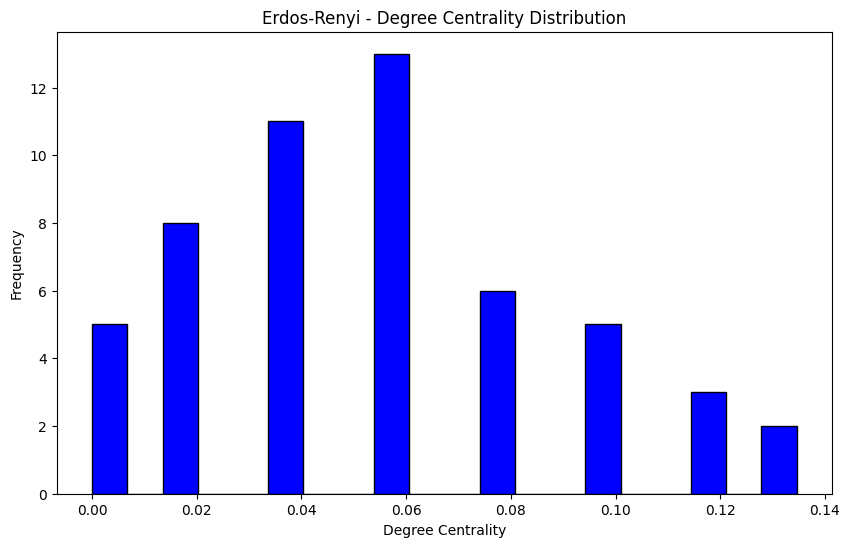

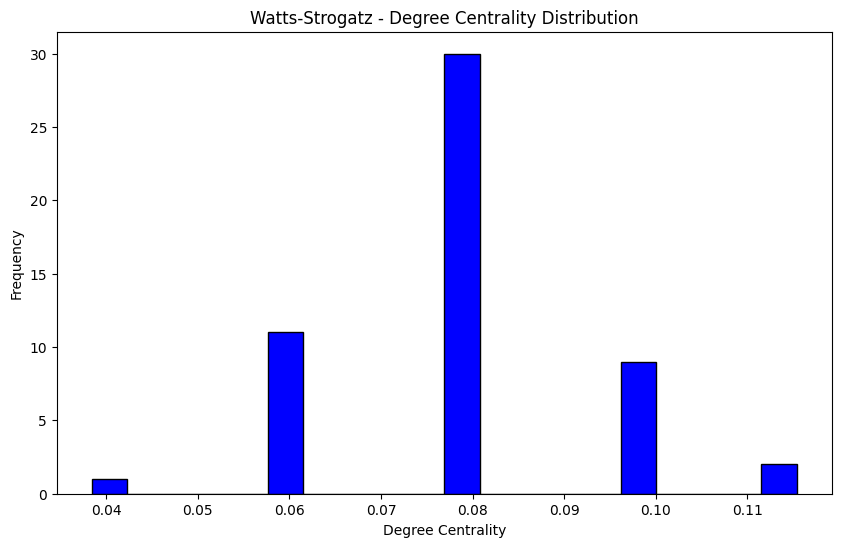

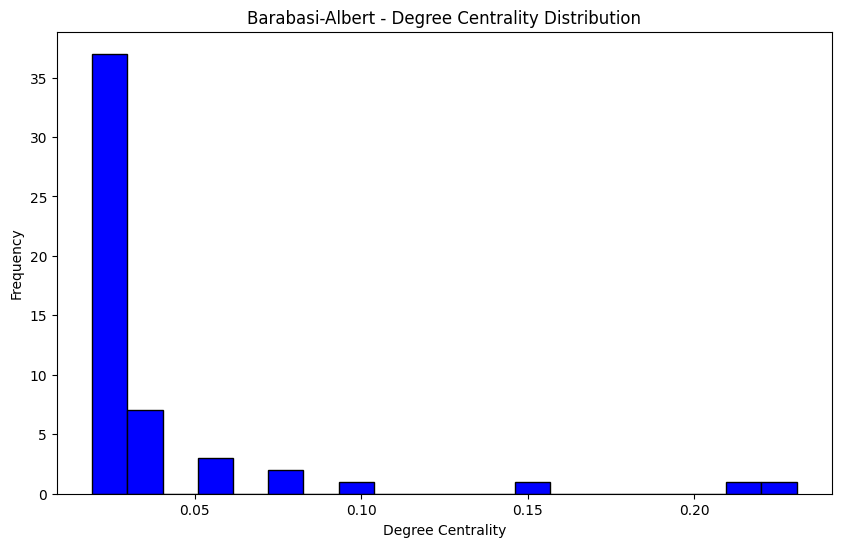

In [7]:
# Compute metrics for each graph
metrics_er = compute_metrics(erdos_renyi_graph)
metrics_ws = compute_metrics(watts_strogatz_graph)
metrics_ba = compute_metrics(barabasi_albert_graph)

# Print the metrics for comparison
for G1, metrics in [("Erdos-Renyi", metrics_er),
                            ("Watts-Strogatz", metrics_ws),
                            ("Barabasi-Albert", metrics_ba)]:
    print(f"\n{G1} Graph Metrics:")
    for metric, value in metrics.items():
        if isinstance(value, dict):
            print(f"  {metric}: {len(value)} values (showing avg)")
            print(f"    Average: {sum(value.values()) / len(value):.4f}")
        else:
            print(f"  {metric}: {value}")

# Visualizing the Degree Centrality Distribution
def plot_centrality_distribution(centrality, title):
    plt.figure(figsize=(10, 6))
    plt.hist(list(centrality.values()), bins=20, color='blue', edgecolor='black')
    plt.title(f'{title} - Degree Centrality Distribution')
    plt.xlabel('Degree Centrality')
    plt.ylabel('Frequency')
    plt.show()

# Plotting Degree Centrality Distribution for each graph
plot_centrality_distribution(metrics_er['degree_centrality'], 'Erdos-Renyi')
plot_centrality_distribution(metrics_ws['degree_centrality'], 'Watts-Strogatz')
plot_centrality_distribution(metrics_ba['degree_centrality'], 'Barabasi-Albert')
plt.show()

## **Conclusion**

Through the analysis and observing the network visualizations created for this project, we can observe that the age and infection attributes are strongly related to each other, but since they have a low centrality in the ER and WS graphs; these attributes are not very important overall (probably also due to the large number of attributes). We can use other attributes and create other graphs for exploration or gaining other insights about the data.